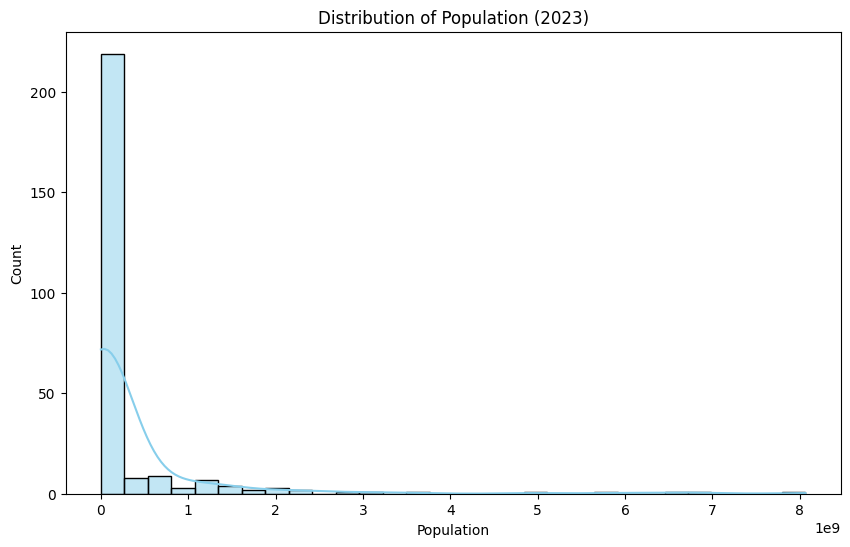

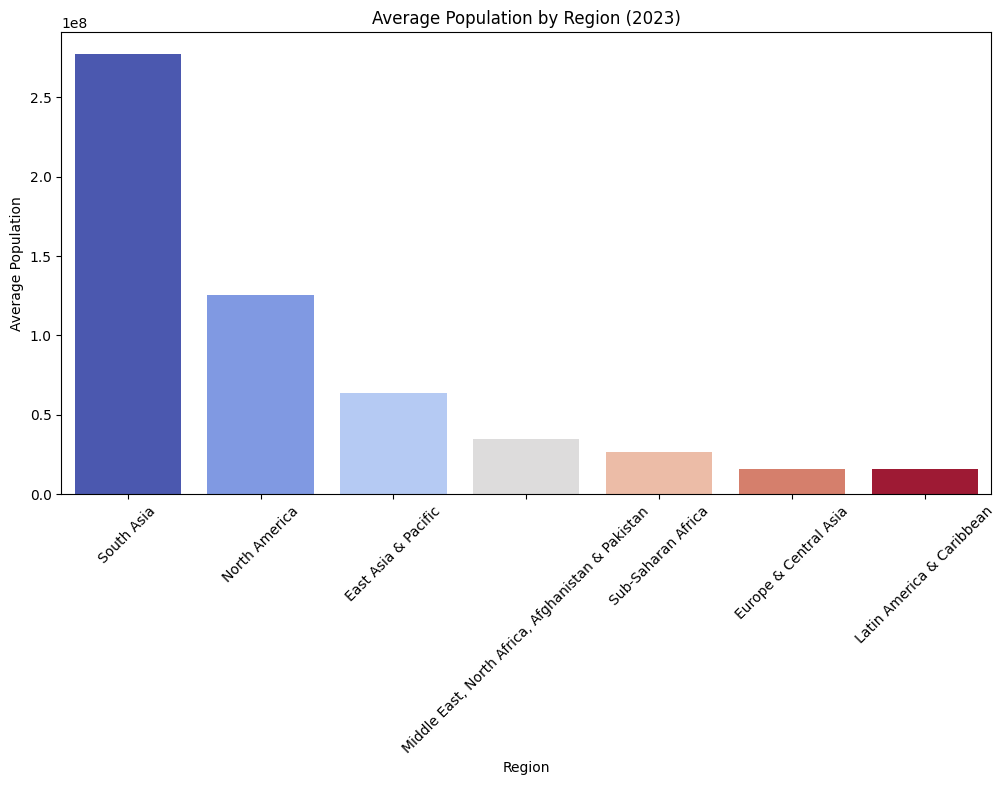

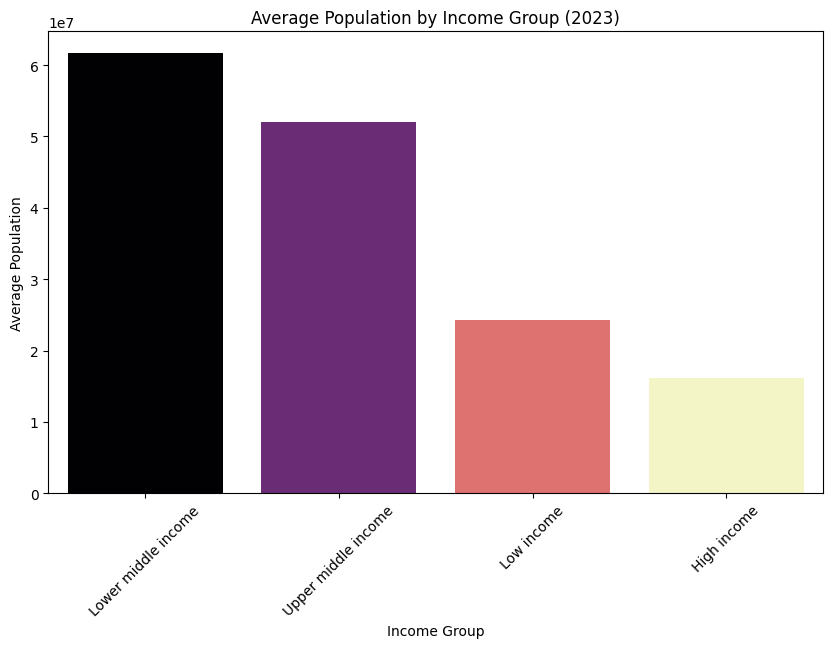

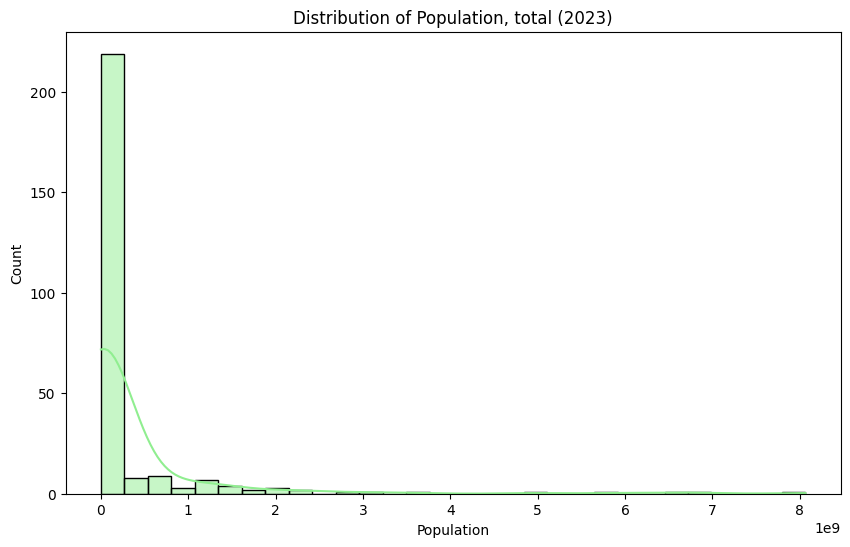

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Load population dataset
pop_file = r"/content/extracted_csv_files/API_SP.POP.TOTL_DS2_en_csv_v2_500349.csv"
df_pop = pd.read_csv(pop_file, skiprows=4)

# Load country metadata
country_meta_file = r"/content/extracted_csv_files/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_500349.csv"
df_country_meta = pd.read_csv(country_meta_file)

# Load indicator metadata
indicator_meta_file = r"/content/extracted_csv_files/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_500349.csv"
df_indicator_meta = pd.read_csv(indicator_meta_file)

# Merge population with country metadata on 'Country Code'
df = pd.merge(df_pop, df_country_meta, on='Country Code', how='left')

# Merge indicator metadata on 'Indicator Code'
df = pd.merge(df, df_indicator_meta, left_on='Indicator Code', right_on='INDICATOR_CODE', how='left')

# Histogram for population in 2023
if '2023' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['2023'].dropna(), bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Population (2023)')
    plt.xlabel('Population')
    plt.ylabel('Count')
    plt.show()

# Top 10 countries by population
if 'Country Name_x' in df.columns and '2023' in df.columns:
    plt.figure(figsize=(12, 6))
    top10 = df[['Country Name_x', '2023']].dropna().sort_values('2023', ascending=False).head(10)
    colors = plt.cm.viridis(np.linspace(0, 1, top10.shape[0])).tolist()  # convert to list
    sns.barplot(x='Country Name_x', y='2023', data=top10, palette=colors)
    plt.xticks(rotation=45)
    plt.title('Top 10 Countries by Population (2023)')
    plt.xlabel('Country')
    plt.ylabel('Population')
    plt.show()

# Average population by Region
if 'Region' in df.columns and '2023' in df.columns:
    pop_by_region = df.groupby('Region')['2023'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    colors = plt.cm.coolwarm(np.linspace(0, 1, pop_by_region.shape[0])).tolist()  # convert to list
    sns.barplot(x=pop_by_region.index, y=pop_by_region.values, palette=colors)
    plt.xticks(rotation=45)
    plt.title('Average Population by Region (2023)')
    plt.xlabel('Region')
    plt.ylabel('Average Population')
    plt.show()

# Average population by Income Group
if 'IncomeGroup' in df.columns and '2023' in df.columns:
    pop_by_income = df.groupby('IncomeGroup')['2023'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    colors = plt.cm.magma(np.linspace(0, 1, pop_by_income.shape[0])).tolist()  # convert to list
    sns.barplot(x=pop_by_income.index, y=pop_by_income.values, palette=colors)
    plt.xticks(rotation=45)
    plt.title('Average Population by Income Group (2023)')
    plt.xlabel('Income Group')
    plt.ylabel('Average Population')
    plt.show()

# Distribution of a specific indicator
if 'Indicator Name' in df.columns and '2023' in df.columns:
    indicator_name = 'Population, total'
    df_indicator = df[df['Indicator Name'] == indicator_name]

    plt.figure(figsize=(10, 6))
    sns.histplot(df_indicator['2023'].dropna(), bins=30, kde=True, color='lightgreen')
    plt.title(f'Distribution of {indicator_name} (2023)')
    plt.xlabel('Population')
    plt.ylabel('Count')
    plt.show()
